## Image transformation

### 1. Translation
Translating an image is shifting it along the x and y axes. A affine transformation can be obtained by using a transformation matrix M. It is a translation matrix which shifts the image by the vector (x, y). The first row of the matrix is [1, 0, x], the second is [0, 1, y]

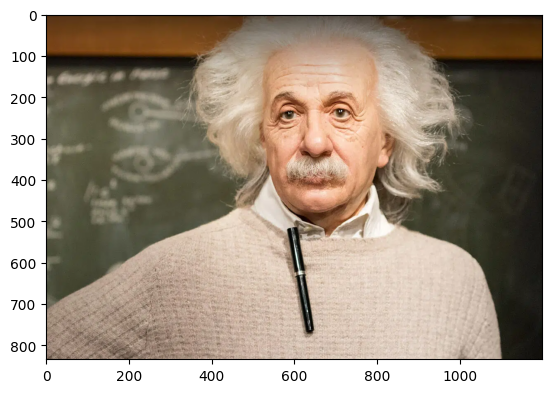

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./2.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [2]:
x = -30
y = 50
size = (img.shape[1],img.shape[0])
M = np.float32([[1, 0, x], [0, 1, y]])
shifted = cv2.warpAffine(img, M, size)

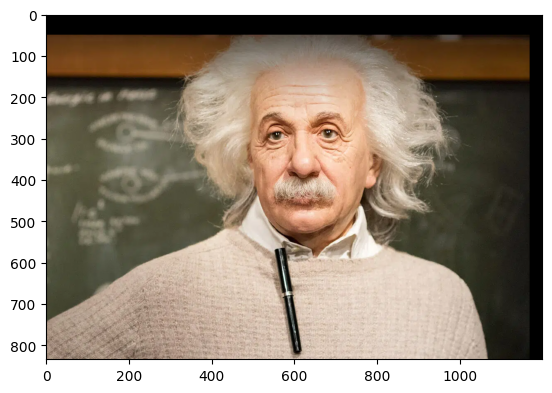

In [3]:
plt.imshow(shifted)

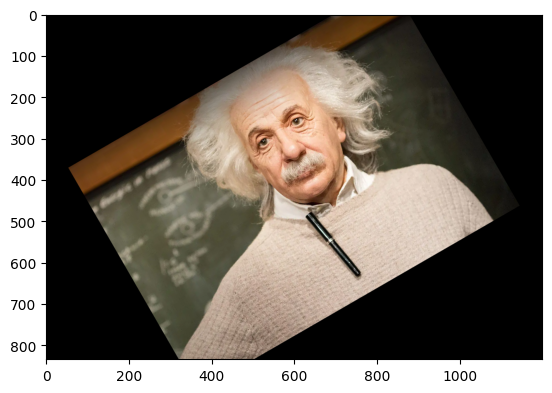

In [4]:
def trackbar(angle):
    M = cv2.getRotationMatrix2D(center, angle, 0.750) 
    rotated = cv2.warpAffine(img, M, (w, h)) 
    plt.imshow(rotated)
    

h, w = img.shape[:2]    
center = w//2, h//2
# plt.imshow(img)
trackbar(30)

###  Scale
Scaling an image is to change its dimension.

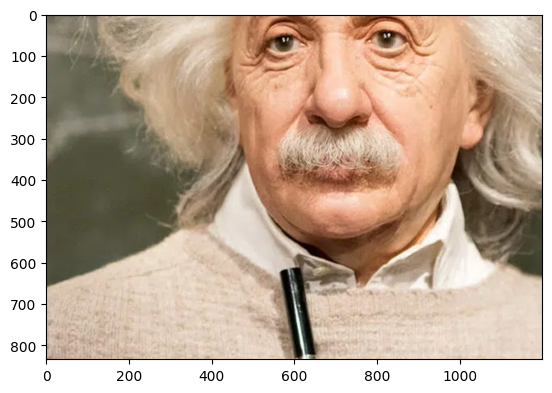

In [5]:
def trackbar(scale):
    M = cv2.getRotationMatrix2D(center, 0, scale) 
    rotated = cv2.warpAffine(img, M, (w, h)) 
    plt.imshow(rotated)
    

h, w = img.shape[:2]
center = w//2, h//2
trackbar(2)

### 4. Flipping
Horizontally or vertically using a key.

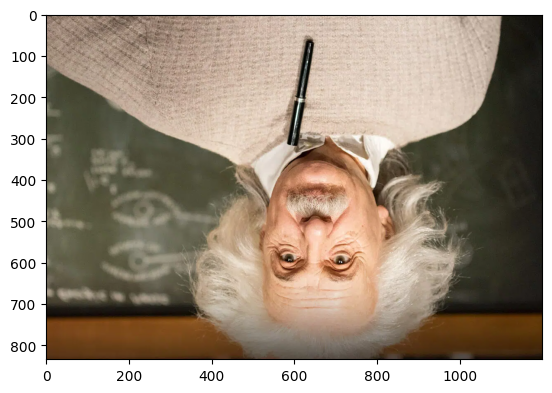

In [6]:
flip_v = cv2.flip(img, 0) 
plt.imshow(flip_v)

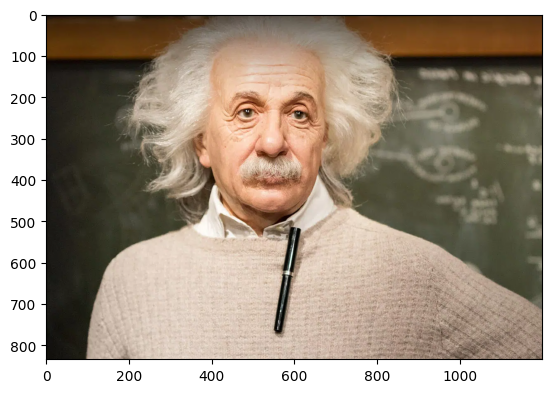

In [7]:
flip_h = cv2.flip(img, 1) 
plt.imshow(flip_h)

### 5. Image artithmetic

The operation add and subtract allow to add two images. The add function is limited to 255. The subtract function is limit to 0. In the example below we add or subtract the value (40, 40, 40) to each pixel. As a result, the image becomes brighter or darker.

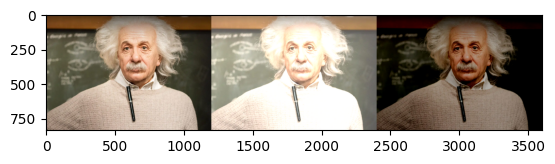

In [8]:
M = np.ones(img.shape, dtype='uint8') * 80

brighter = cv2.add(img, M)
darker = cv2.subtract(img, M)

img2 = np.hstack([img, brighter, darker])
plt.imshow(img2)

### 6 Bitwise operations
Bitwise operations act on grayscale images. Most often it is used on black and white images. We start wtih a circle and a square shape and calculate this three bitwise operations:
- and
- or
- xor (exclusive or)

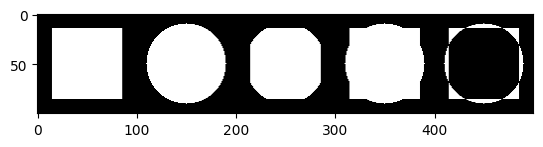

In [11]:
d = 15
rect = np.zeros((100, 100), np.uint8)
cv2.rectangle(rect, (d, d), (100-d, 100-d), 255, -1)
circle = np.zeros((100, 100), np.uint8)
cv2.circle(circle, (50, 50), 40, 255, -1)
bit_and = cv2.bitwise_and(rect, circle)
bit_or = cv2.bitwise_or(rect, circle)
bit_xor = cv2.bitwise_xor(rect, circle)
img3 = np.hstack([rect, circle, bit_and, bit_or, bit_xor])
plt.imshow(img3, cmap = 'gray')

#### There is other methods that you can use and opencv has called it bitwise_not. Check it after this course

### 7 Masking
We can use a mask to extract only a certain part of an image.

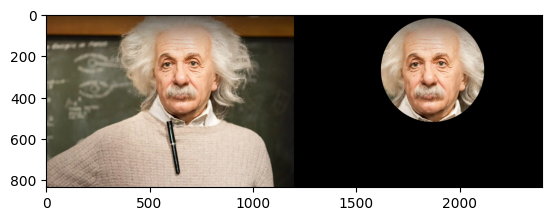

In [14]:
mask = np.zeros(img.shape[:2], dtype='uint8')
cv2.circle(mask, (670, 270), 250, 255, -1)
masked = cv2.bitwise_and(img, img, mask=mask)
img4 = np.hstack([img, masked])
plt.imshow(img4)

## Thresholding, filters and convolution

The basic Thresholding technique is Binary Thresholding. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value.
The different Simple Thresholding Techniques are: 
 

- cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
- cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.
- cv2.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
- cv2.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
- cv2.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 

Parameters: 
- source: Input Image array (must be in Grayscale). 
- thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
- maxVal: Maximum value that can be assigned to a pixel. 
- thresholdingTechnique: The type of thresholding to be applied. 

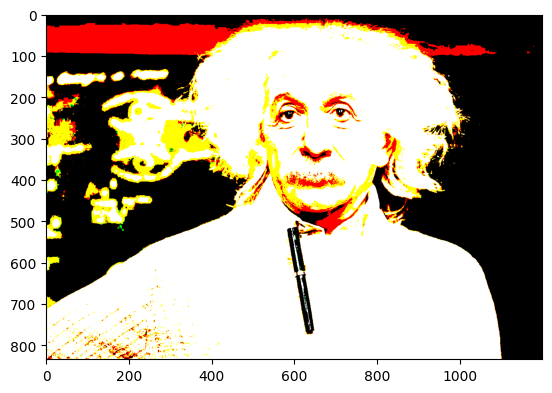

In [17]:
x = 100
ret, img1 = cv2.threshold(img, x, 255, cv2.THRESH_BINARY)
plt.imshow(img1)

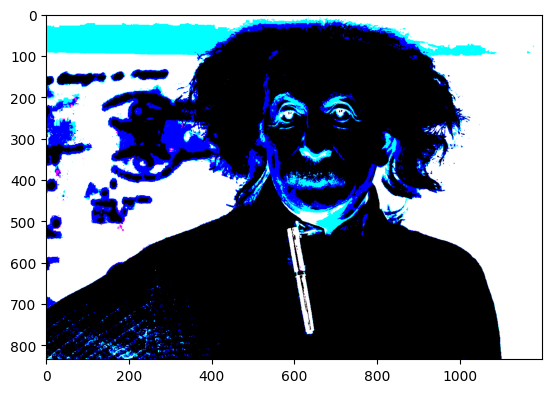

In [18]:
ret, img2 = cv2.threshold(img, x, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img2)

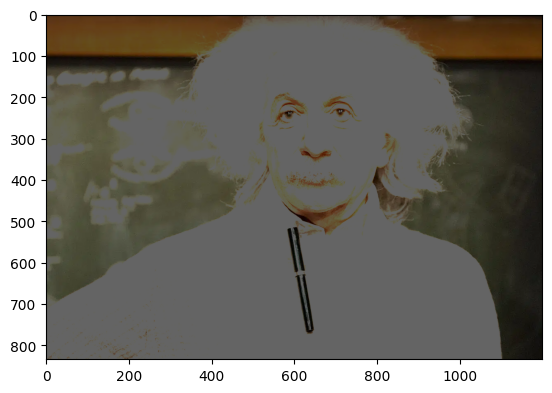

In [19]:
ret, img3 = cv2.threshold(img, x, 255, cv2.THRESH_TRUNC)
plt.imshow(img3)

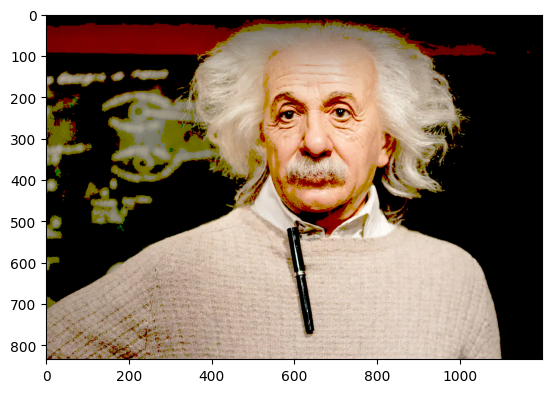

In [20]:
ret, img4 = cv2.threshold(img, x, 255, cv2.THRESH_TOZERO)
plt.imshow(img4)

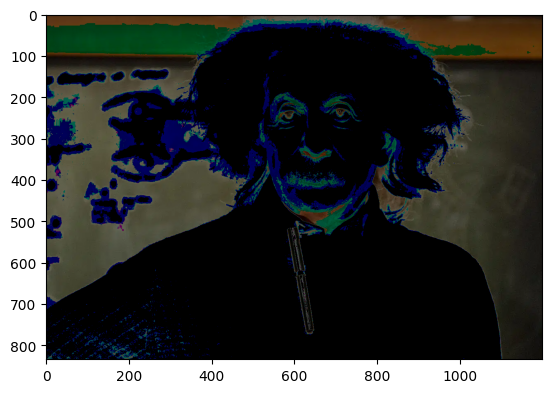

In [21]:
ret, img5 = cv2.threshold(img, x, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(img5)

## Bluring

The averaging method is very similar to the 2d convolution method as it is following the same rules to smoothen or blur an image and uses the same type of kernel which will basically set the center pixel’s value to the average of the kernel weighted surrounding pixels. And by this, we can greatly reduce the noise of the image by reducing the clarity of an image by replacing the group of pixels with similar values which is basically similar color. We can greatly reduce the noise of the image and smoothen the image. The kernel we are using for this method is the desired shape of a matrix with all the values as “1”  and the whole matrix is divided by the number of values in the respective shape of the matrix [which is basically averaging the kernel weighted values in the pixel range]. 

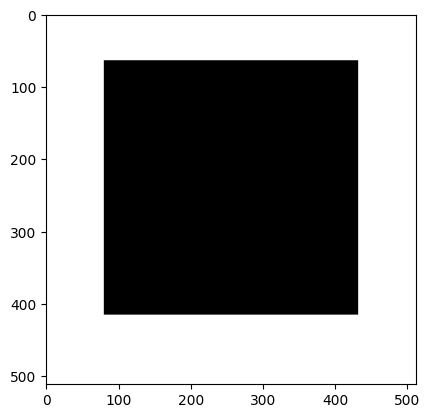

In [23]:
square_img = cv2.imread('square.png')
plt.imshow(square_img)

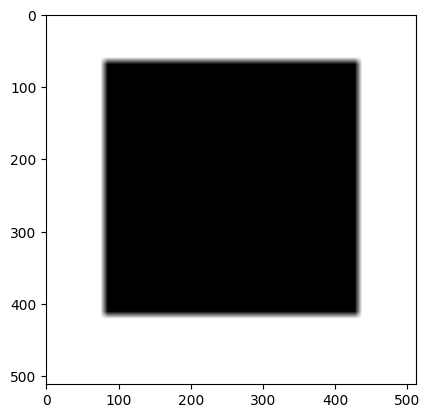

In [24]:
ksize = (10, 10)  
# Using cv2.blur() method 
blur = cv2.blur(square_img, ksize) 
plt.imshow(blur)

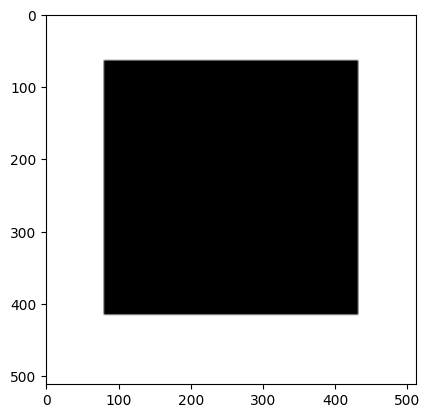

In [28]:
ksize = (3, 3)
blur2 = cv2.blur(square_img, ksize) 
plt.imshow(blur2)

In a gaussian blur, instead of using a box filter consisting of similar values inside the kernel which is a simple mean we are going to use a weighted mean. In this type of kernel, the values near the center pixel will have a higher weight. With this type of blurs, we will probably get a less blurred image but a natural blurred image which will look more natural because it handles the edge values very well. Instead of averaging the weighted sum of the pixels here, we will divide it with a specific value which is 16 in the case of a 3 by 3 shaped kernel which will look like this.

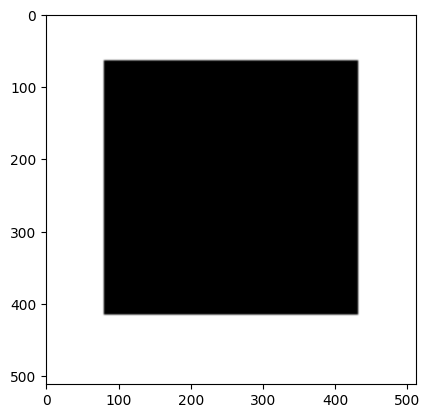

In [29]:
# Gaussian blurring
gausBlur = cv2.GaussianBlur(square_img, (5,5),0) 
plt.imshow(gausBlur)

In this method of smoothing, we will simply take the median of all the pixels inside the kernel window and replace the center value with this value. The one positive of this method over the gaussian and box blur is in these two cases the replaced center value may contain a pixel value that is not even present in the image which will make the image’s color different and weird to look, but in case of a median blur though it takes the median of the values that are already present in the image it will look a lot more natural.

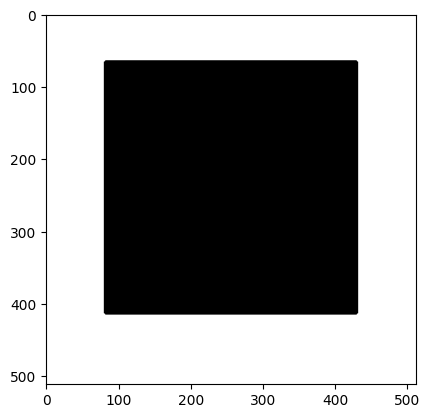

In [30]:
# Median blurring
medBlur = cv2.medianBlur(square_img,5)
plt.imshow(medBlur)

The smoothening methods we saw earlier are fast but we might end up losing the edges of the image which is not so good. But by using this method, this function concerns more about the edges and smoothens the image by preserving the images. This is achieved by performing two gaussian distributions. This might be very slow while comparing to the other methods we discussed so far.

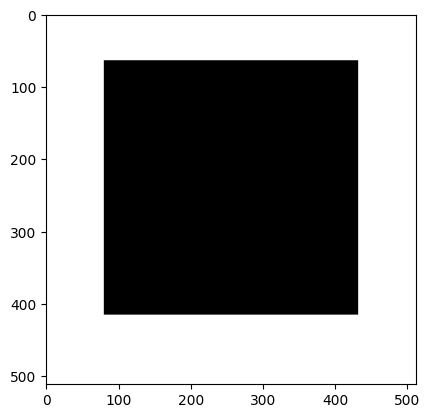

In [31]:
# Bilateral Filtering
bilFilter = cv2.bilateralFilter(square_img,51,75,75)
plt.imshow(bilFilter)

To smoothen an image with a custom-made kernel we are going to use a function called filter2D() which basically helps us to convolve a custom-made kernel with an image to achieve different image filters like sharpening and blurring and more.

Syntax: filter2D (src, dst, ddepth, kernel)

Parameters:  

- Src – The source image to apply the filter on.
- Dst – Name of the output image after applying the filter
- Ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image]
- Kernel – The 2d matrix we want the image to convolve with.

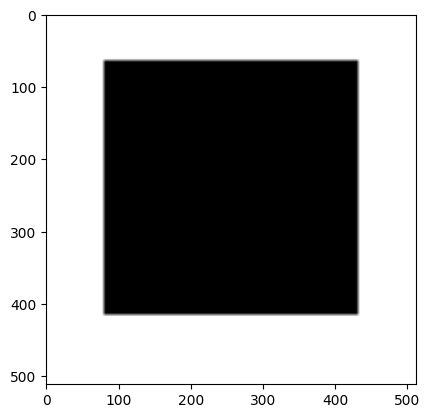

In [43]:
kernel2 = np.ones((5, 5), np.float32)/25

# Applying the filter
filtered = cv2.filter2D(src=square_img, ddepth=-1, kernel=kernel2)
plt.imshow(filtered)

## Some famous features of opencv

1. cv2.rectangle     to draw a rectangle on image
2. cv2.circle        to draw a circle on image
3. cv2.putText       to write a text on image

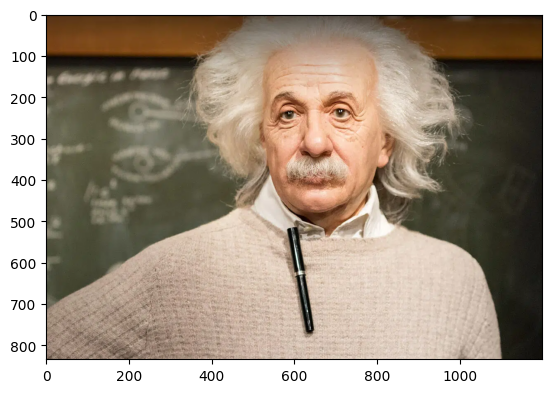

In [44]:
img = cv2.imread('./2.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Rectangle

Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)

Parameters:
- image: It is the image on which rectangle is to be drawn.
- start_point: It is the starting coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
- end_point: It is the ending coordinates of rectangle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
- color: It is the color of border line of rectangle to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
- thickness: It is the thickness of the rectangle border line in px. Thickness of -1 px will fill the rectangle shape by the specified color.

Return Value: It returns an image.

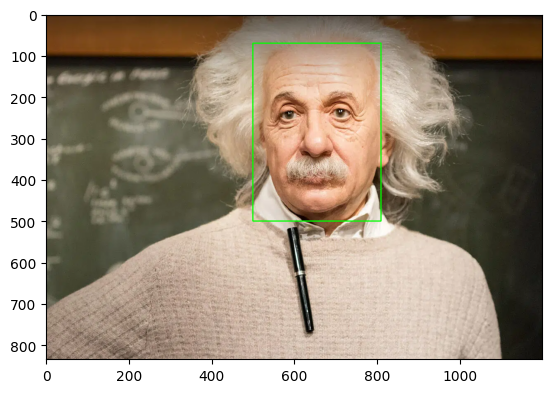

In [45]:
# image = cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.rectangle(img, (500, 70), (810, 500), (0,255,0), 2)
plt.imshow(img)

## circle

Syntax: 

cv2.circle(image, center_coordinates, radius, color, thickness)
Parameters: 

- image: It is the image on which the circle is to be drawn. 
- center_coordinates: It is the center coordinates of the circle. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value). 
- radius: It is the radius of the circle. 
- color: It is the color of the borderline of a circle to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color. 
- thickness: It is the thickness of the circle border line in px. Thickness of -1 px will fill the circle shape by the specified color.

Return Value: It returns an image. 

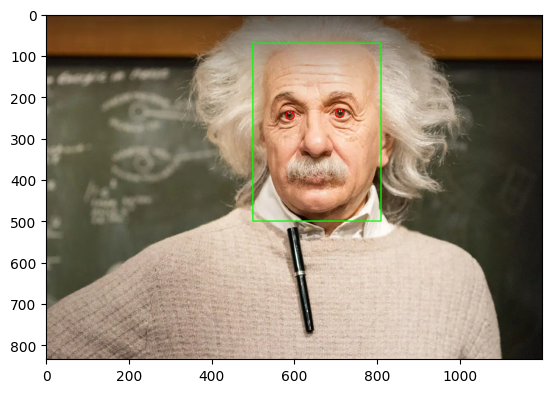

In [46]:
# image = cv2.circle(image, center_coordinates, radius, color, thickness) 
cv2.circle(img, (590,245), 10, (255,0,0), 2)
cv2.circle(img, (710,240), 10, (255,0,0), 2)
plt.imshow(img)

## Putting Text 

Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

Parameters:
- image: It is the image on which text is to be drawn.
- text: Text string to be drawn.
- org: It is the coordinates of the bottom-left corner of the text string in the image. The coordinates are represented as tuples of two values i.e. (X coordinate value, Y coordinate value).
- font: It denotes the font type. Some of font types are FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, , etc.
- fontScale: Font scale factor that is multiplied by the font-specific base size.
- color: It is the color of text string to be drawn. For BGR, we pass a tuple. eg: (255, 0, 0) for blue color.
- thickness: It is the thickness of the line in px.
- lineType: This is an optional parameter.It gives the type of the line to be used.
- bottomLeftOrigin: This is an optional parameter. When it is true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

- Return Value: It returns an image.

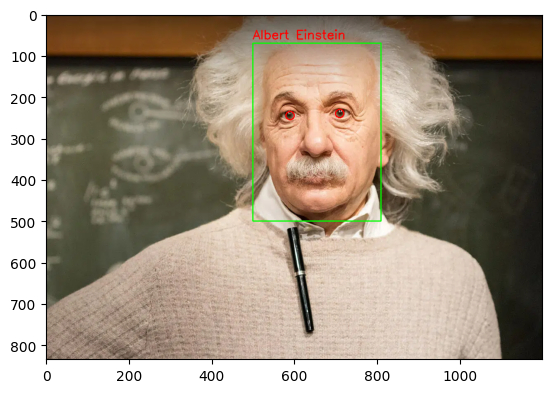

In [47]:
# image = cv2.putText(image, 'Text', org, font,  fontScale, color, thickness)
text = 'Albert Einstein'
cv2.putText(img, text, (500, 60), cv2.FONT_HERSHEY_SIMPLEX,  1, (255,0,0), 2)
plt.imshow(img)